In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# dictionary to map state names to their abbreviation. Credits @rogerallen on github
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}


In [5]:
# Load merged dataframe from data folder
hs2020_df = pd.read_csv('data/merged_2020_hs.csv')
print(hs2020_df.head())
print(hs2020_df.columns)

   ncessch_num  year  read_test_pct_prof_midpt  math_test_pct_prof_midpt  \
0  10000500871  2020                      22.0                      19.0   
1  10000500871  2020                      10.0                      10.0   
2  10000500871  2020                      12.0                       7.5   
3  10000500871  2020                      22.0                      22.0   
4  10000500871  2020                       5.0                       5.0   

   grade_edfacts  race  sex  lep  homeless  migrant  ...     pertr  perwhite  \
0             99    99   99   99        99       99  ...  0.023661  0.439602   
1             99    99   99   99        99       99  ...  0.023661  0.439602   
2             99    99   99   99        99       99  ...  0.023661  0.439602   
3             99    99    2   99        99       99  ...  0.023661  0.439602   
4             99    99   99    1        99       99  ...  0.023661  0.439602   

            level  perpoverty              school_name        

# Introduction to the dataset
### Sources
Common Core of Data: https://nces.ed.gov/ccd/
EdFacts Data: https://www2.ed.gov/about/inits/ed/edfacts/index.html
Modern Estimates of Poverty in Schools: https://www.urban.org/projects/modeled-estimates-poverty-schools 
Longitudinal Imputed School Dataset: https://edopportunity.org/segregation/about/ 

# Metadata
ncessch_num - school id
### The following variables are used for filtering the assesment data
read_test_pct_prof_midpt - reading proficiency
math_test_pct_prof_midpt - math proficiency
grade_edfacts - grade
race - 
    1—White
    2—Black
    3—Hispanic
    4—Asian
    5—American Indian or Alaska Native
    6—Native Hawaiian or other Pacific Islander
    7—Two or more races
    8—Nonresident alien
    9—Unknown
    20—Other
    99—Total
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
sex -
    1—Male
    2—Female
    3—Gender
    9—Unknown
    99—Total
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
lep - limited english proficiency
    1—Students who are limited English proficient
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
homeless
    1—Students who are homeless
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
migrant
    1—Students who are migrants
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
disability
    1—Students with disabilities
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
econ_disadvantaged
    1—Students who are economically disadvantaged
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
foster_care
    1—Students who are in foster care
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
military_connected
    1—Students who are military connected
    99—All students
    -1—Missing/not reported
    -2—Not applicable
    -3—Suppressed data
### The following variables apply to the whole school
perflunch - free lunch
perrlunch - reduced lunch
perfrlunch - free and reduced lunch
pernam - native american
perasian - asian
perhisp - hispanic
perblack - black
pertr - two or more races
perwhite - white
level - this dataset is only high schools, hence the value is always High/Secondary
perpoverty - poverty
### Location Data
school_name
city
state
zip
latitude
longitude

In [3]:
null_counts = hs2020_df.isnull().sum()
print(null_counts)

ncessch_num                 0
year                        0
read_test_pct_prof_midpt    0
math_test_pct_prof_midpt    0
grade_edfacts               0
race                        0
sex                         0
lep                         0
homeless                    0
migrant                     0
disability                  0
econ_disadvantaged          0
foster_care                 0
military_connected          0
perflunch                   0
perrlunch                   0
perfrlunch                  0
pernam                      0
perasian                    0
perhisp                     0
perblack                    0
pertr                       0
perwhite                    0
level                       0
perpoverty                  0
school_name                 0
city                        0
state                       0
zip                         0
latitude                    0
longitude                   0
dtype: int64


# Questions to ask
## Overarching Inquiry is to understand the relationship between race, poverty, and student performance
1. Is there a relationship between a school's racial population and poverty?
2. What is the relationship between a school's hispanic+black population and assessment scores?
3. Does the percentage of economically disadvantaged students (or poverty or free reduced lunch) in a school have a relationship with assessment scores?

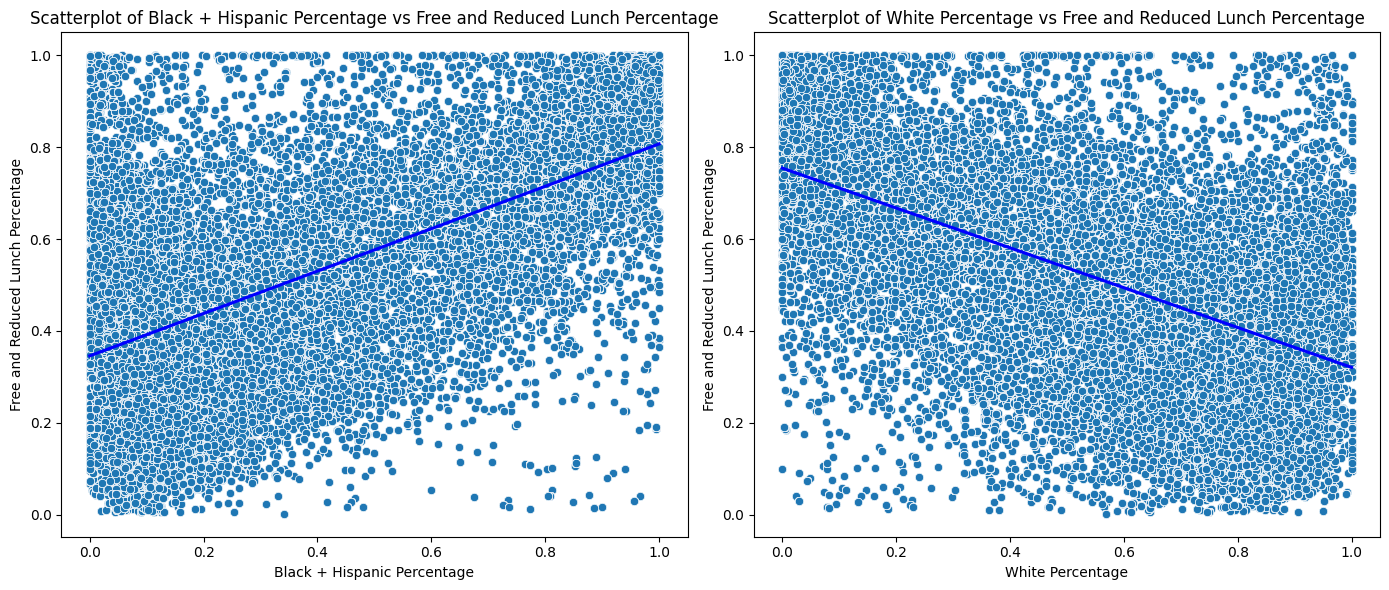

In [13]:
# Create a new column for black+hispanic percentage
hs2020_df['black_hispanic'] = hs2020_df['perhisp'] + hs2020_df['perblack']

# First scatterplot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=hs2020_df, x='black_hispanic', y='perfrlunch')
sns.regplot(data=hs2020_df, x='black_hispanic', y='perfrlunch', scatter=False, color='blue')
plt.xlabel('Black + Hispanic Percentage')
plt.ylabel('Free and Reduced Lunch Percentage')
plt.title('Scatterplot of Black + Hispanic Percentage vs Free and Reduced Lunch Percentage')

# Second scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=hs2020_df, x='perwhite', y='perfrlunch')
sns.regplot(data=hs2020_df, x='perwhite', y='perfrlunch', scatter=False, color='blue')
plt.xlabel('White Percentage')
plt.ylabel('Free and Reduced Lunch Percentage')
plt.title('Scatterplot of White Percentage vs Free and Reduced Lunch Percentage')

plt.tight_layout()
plt.show()